In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Reading Files

In [2]:

monk1_train = 'monk/monks-1.train'
monk1_test = 'monk/monks-1.test'

monk2_train = 'monk/monks-2.train'
monk2_test = 'monk/monks-2.test'

monk3_train = 'monk/monks-3.train'
monk3_test = 'monk/monks-3.test'



### Monk1

In [3]:
#train
monk1_train_data = pd.read_csv(monk1_train, sep=' ', header=None,) 
# dropping the first column
monk1_train_data = monk1_train_data.drop(monk1_train_data.columns[0], axis=1) 
#renaming the columns according to the dataset description
monk1_train_data.rename(columns={1: 'target',
                                 2: 'a1',
                                 3: 'a2',
                                 4: 'a3',
                                 5: 'a4',
                                 6: 'a5',
                                 7: 'a6',
                                 8:'ID'
                                 }, inplace=True)

#test
monk1_test_data = pd.read_csv(monk1_test, sep=' ', header=None,) 
# dropping the first column
monk1_test_data = monk1_test_data.drop(monk1_test_data.columns[0], axis=1) 
#renaming the columns according to the dataset description
monk1_test_data.rename(columns={1: 'target',
                                 2: 'a1',
                                 3: 'a2',
                                 4: 'a3',
                                 5: 'a4',
                                 6: 'a5',
                                 7: 'a6',
                                  8:'ID'
                                 }, inplace=True)
print('MONK1')
print('Train data')
print(monk1_train_data.head())
print('Test data')
print(monk1_test_data.head())

MONK1
Train data
   target  a1  a2  a3  a4  a5  a6       ID
0       1   1   1   1   1   3   1   data_5
1       1   1   1   1   1   3   2   data_6
2       1   1   1   1   3   2   1  data_19
3       1   1   1   1   3   3   2  data_22
4       1   1   1   2   1   2   1  data_27
Test data
   target  a1  a2  a3  a4  a5  a6      ID
0       1   1   1   1   1   1   1  data_1
1       1   1   1   1   1   1   2  data_2
2       1   1   1   1   1   2   1  data_3
3       1   1   1   1   1   2   2  data_4
4       1   1   1   1   1   3   1  data_5


### MONK 2

In [5]:

###################  MONK2   ##############################
#train
monk2_train_data = pd.read_csv(monk2_train, sep=' ', header=None,) 
# dropping the first column
monk2_train_data = monk2_train_data.drop(monk2_train_data.columns[0], axis=1) 
#renaming the columns according to the dataset description
monk2_train_data.rename(columns={1: 'target',
                                 2: 'a1',
                                 3: 'a2',
                                 4: 'a3',
                                 5: 'a4',
                                 6: 'a5',
                                 7: 'a6',
                                  8:'ID'
                                 }, inplace=True)

#test
monk2_test_data = pd.read_csv(monk2_test, sep=' ', header=None,) 
# dropping the first column
monk2_test_data = monk2_test_data.drop(monk2_test_data.columns[0], axis=1) 
#renaming the columns according to the dataset description
monk2_test_data.rename(columns={1: 'target',
                                 2: 'a1',
                                 3: 'a2',
                                 4: 'a3',
                                 5: 'a4',
                                 6: 'a5',
                                 7: 'a6',
                                  8:'ID'
                                 }, inplace=True)





print('----------------------------')
print('MONK2')
print('Train data')
print(monk2_train_data.head())
print('Test data')
print(monk2_test_data.head())



----------------------------
MONK2
Train data
   target  a1  a2  a3  a4  a5  a6       ID
0       0   1   1   1   1   2   2   data_4
1       0   1   1   1   1   4   1   data_7
2       0   1   1   1   2   1   1   data_9
3       0   1   1   1   2   1   2  data_10
4       0   1   1   1   2   2   1  data_11
Test data
   target  a1  a2  a3  a4  a5  a6      ID
0       0   1   1   1   1   1   1  data_1
1       0   1   1   1   1   1   2  data_2
2       0   1   1   1   1   2   1  data_3
3       0   1   1   1   1   2   2  data_4
4       0   1   1   1   1   3   1  data_5


### MONK 3

In [6]:

# ####################  MONK3   ##############################
#train
monk3_train_data = pd.read_csv(monk3_train, sep=' ', header=None,) 
# dropping the first column
monk3_train_data = monk3_train_data.drop(monk3_train_data.columns[0], axis=1) 
#renaming the columns according to the dataset description
monk3_train_data.rename(columns={1: 'target',
                                 2: 'a1',
                                 3: 'a2',
                                 4: 'a3',
                                 5: 'a4',
                                 6: 'a5',
                                 7: 'a6',
                                  8:'ID'
                                 }, inplace=True)


#test
monk3_test_data = pd.read_csv(monk3_test, sep=' ', header=None,) 
# dropping the first column
monk3_test_data = monk3_test_data.drop(monk3_test_data.columns[0], axis=1) 
#renaming the columns according to the dataset description
monk3_test_data.rename(columns={1: 'target',
                                 2: 'a1',
                                 3: 'a2',
                                 4: 'a3',
                                 5: 'a4',
                                 6: 'a5',
                                 7: 'a6',
                                  8:'ID'
                                 }, inplace=True)

print('----------------------------')
print('MONK3')
print('Train data')
print(monk3_train_data.head())
print('Test data')
print(monk3_test_data.head())

----------------------------
MONK3
Train data
   target  a1  a2  a3  a4  a5  a6      ID
0       1   1   1   1   1   1   2  data_2
1       1   1   1   1   1   2   1  data_3
2       1   1   1   1   1   2   2  data_4
3       0   1   1   1   1   3   1  data_5
4       0   1   1   1   1   4   1  data_7
Test data
   target  a1  a2  a3  a4  a5  a6      ID
0       1   1   1   1   1   1   1  data_1
1       1   1   1   1   1   1   2  data_2
2       1   1   1   1   1   2   1  data_3
3       1   1   1   1   1   2   2  data_4
4       1   1   1   1   1   3   1  data_5


## Discovering Data

In [7]:
monk1_train_data.info()
print('---------------------------')
monk2_train_data.info()
print('---------------------------')
monk3_train_data.info()
print('---------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  124 non-null    int64 
 1   a1      124 non-null    int64 
 2   a2      124 non-null    int64 
 3   a3      124 non-null    int64 
 4   a4      124 non-null    int64 
 5   a5      124 non-null    int64 
 6   a6      124 non-null    int64 
 7   ID      124 non-null    object
dtypes: int64(7), object(1)
memory usage: 7.9+ KB
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  169 non-null    int64 
 1   a1      169 non-null    int64 
 2   a2      169 non-null    int64 
 3   a3      169 non-null    int64 
 4   a4      169 non-null    int64 
 5   a5      169 non-null    int64 
 6   a6      169 non-null    int64 
 7   ID      169 non-null    o

### Target Distribution

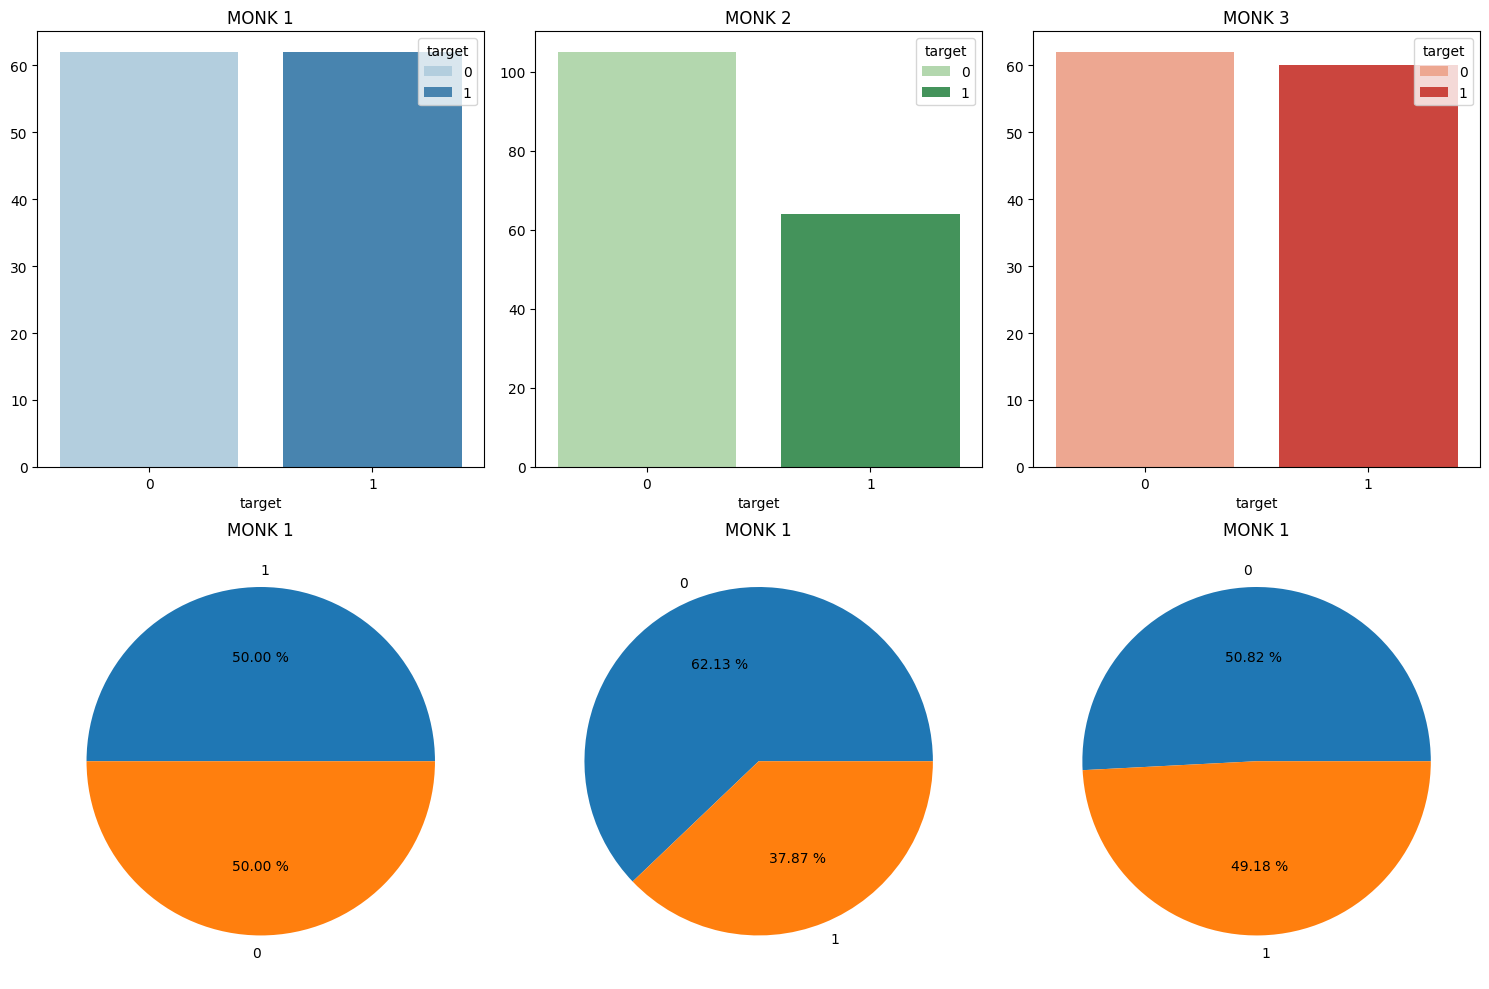

In [8]:

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

#  (MONK 1)
sns.barplot(x=monk1_train_data.target.value_counts().index, 
            y=monk1_train_data.target.value_counts().values, 
            ax=axs[0,0], 
            hue=monk1_train_data.target.value_counts().index, 
            palette='Blues',
            )
axs[0,0].set_title('MONK 1')

axs[1,0].pie(monk1_train_data.target.value_counts().values,labels=monk1_train_data.target.value_counts().index, autopct='%.2f %%')
axs[1,0].set_title('MONK 1')



# (MONK 2)
sns.barplot(x=monk2_train_data.target.value_counts().index, 
            y=monk2_train_data.target.value_counts().values, 
            ax=axs[0,1], 
            hue=monk2_train_data.target.value_counts().index, 
            palette='Greens')
axs[0,1].set_title('MONK 2')
axs[1,1].pie(monk2_train_data.target.value_counts().values,labels=monk2_train_data.target.value_counts().index, autopct='%.2f %%')
axs[1,1].set_title('MONK 1')



# (MONK 3)
sns.barplot(x=monk3_train_data.target.value_counts().index, 
            y=monk3_train_data.target.value_counts().values, 
            ax=axs[0,2], 
            hue=monk3_train_data.target.value_counts().index, 
            palette='Reds')
axs[0,2].set_title('MONK 3')
axs[1,2].pie(monk3_train_data.target.value_counts().values,labels=monk3_train_data.target.value_counts().index, autopct='%.2f %%')
axs[1,2].set_title('MONK 1')




plt.tight_layout()
plt.show()

### MONK1 attributes 

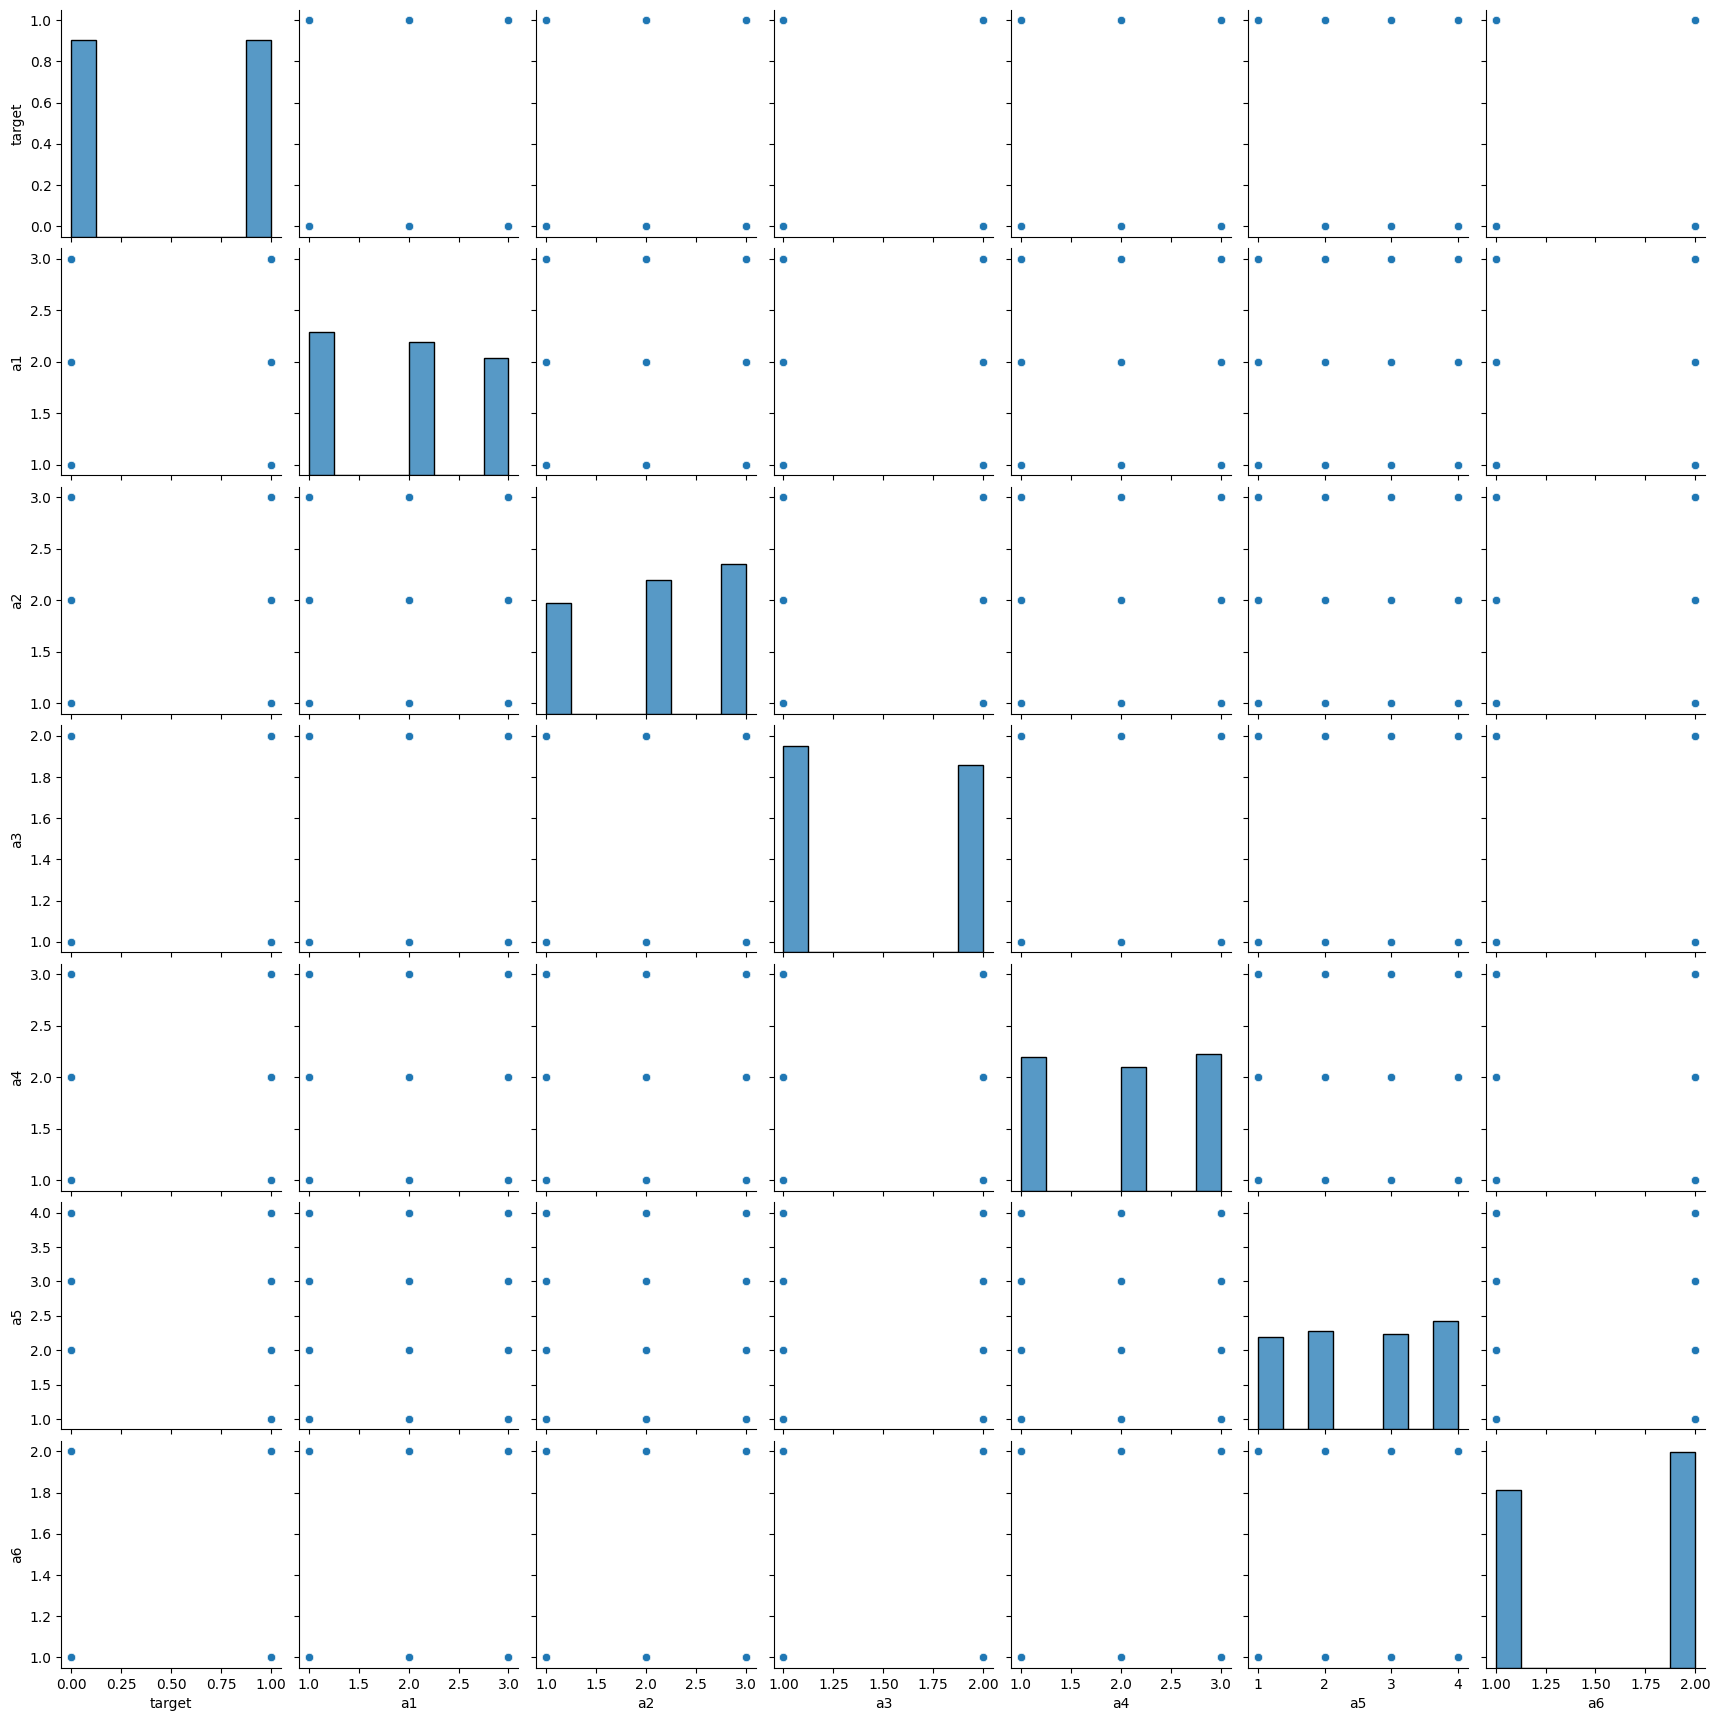

In [9]:
import seaborn as sns
sns.pairplot(monk1_train_data)

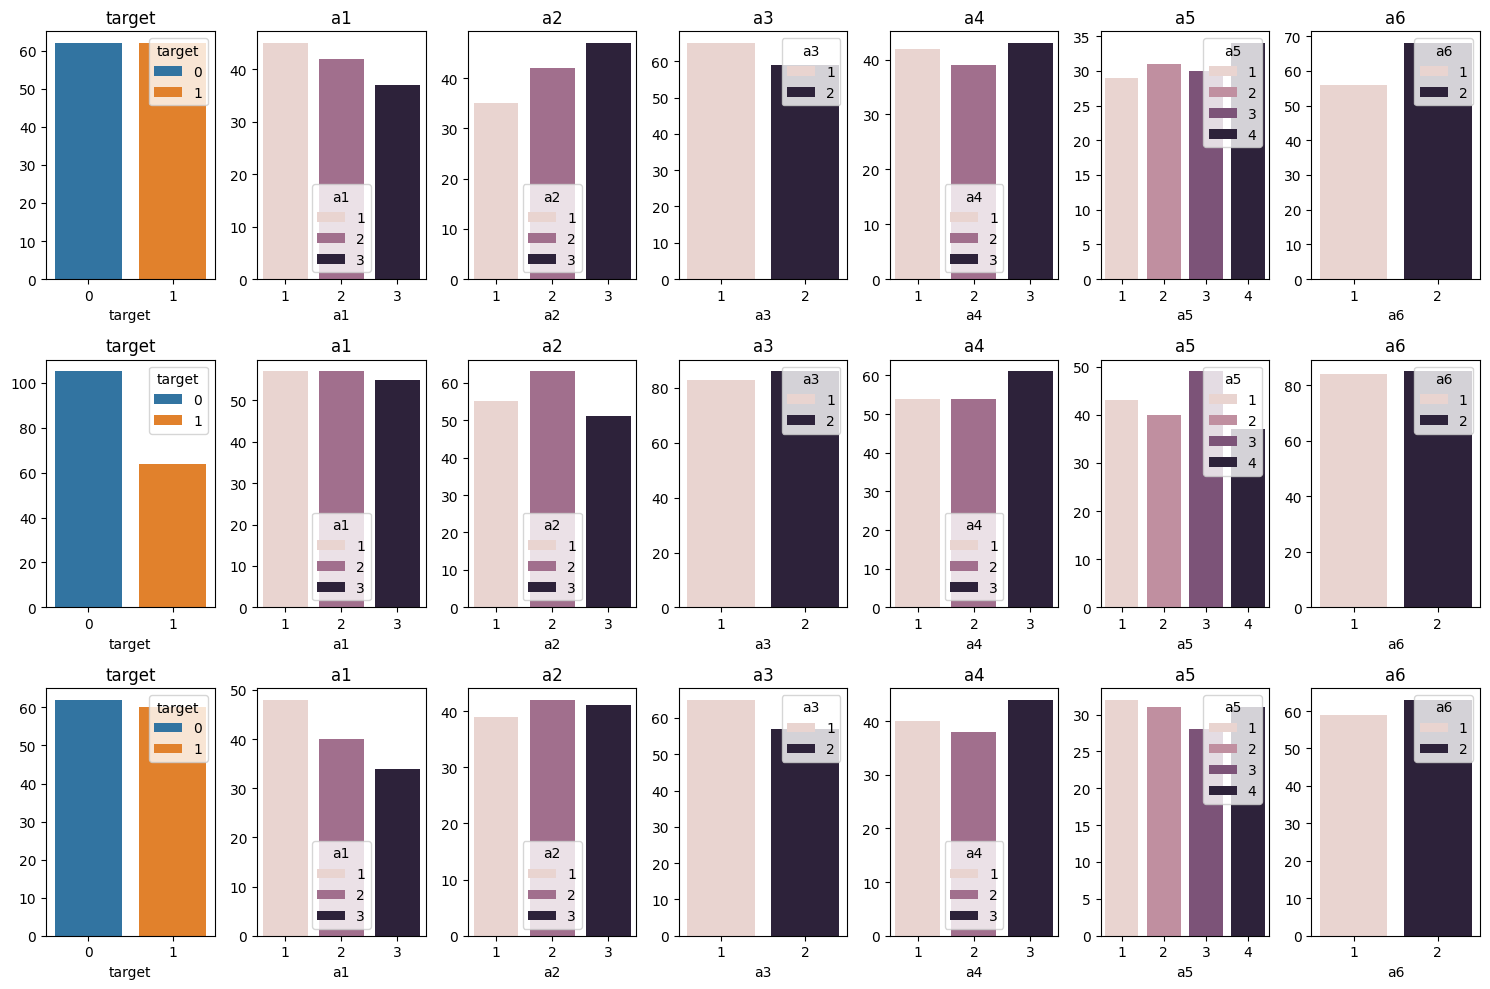

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features_monk1 = monk1_train_data.select_dtypes(exclude=['object'])
numerical_features_monk2 = monk2_train_data.select_dtypes(exclude=['object'])
numerical_features_monk3 = monk3_train_data.select_dtypes(exclude=['object'])


# Create subplots: 3 rows for each monk, 7 columns for each feature
fig, axs = plt.subplots(3, 7, figsize=(15, 10))



def showBarPlot(data,axis_row):
    # Loop through features and create bar plots
    for i, feature in enumerate(data.columns):
        sns.barplot(
            x=data[feature].value_counts(). index,  
            y=data[feature].value_counts().values,  
            hue=data[feature].value_counts(). index,
            ax=axs[axis_row,i],  
        )
        axs[axis_row,i].set_title(f'{feature}')

showBarPlot(numerical_features_monk1,0)
showBarPlot(numerical_features_monk2,1)
showBarPlot(numerical_features_monk3,2)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


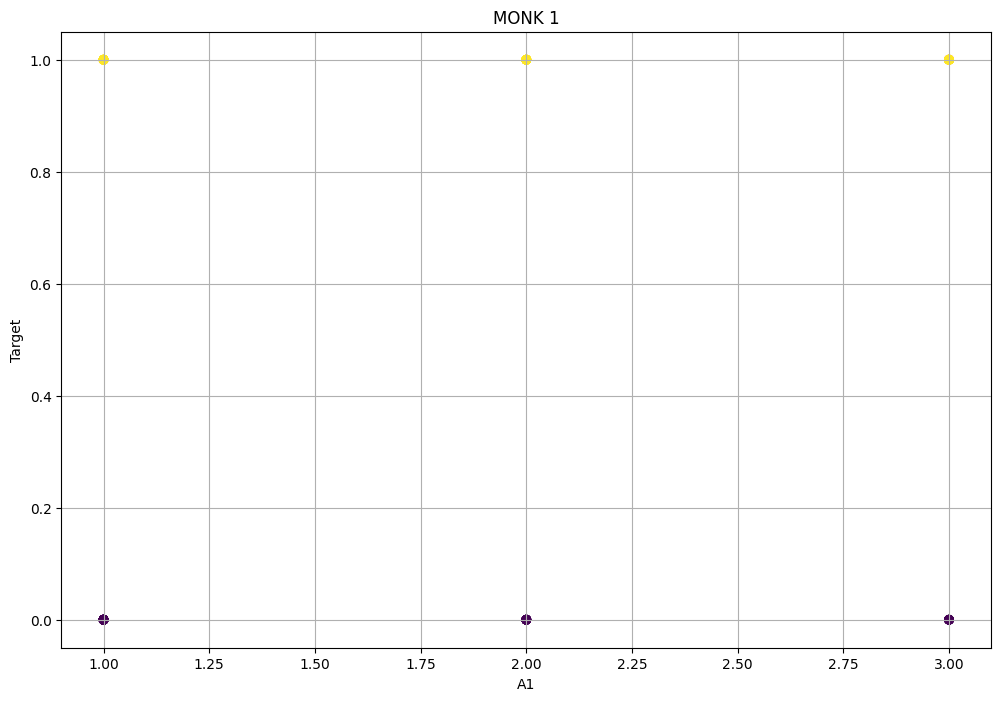

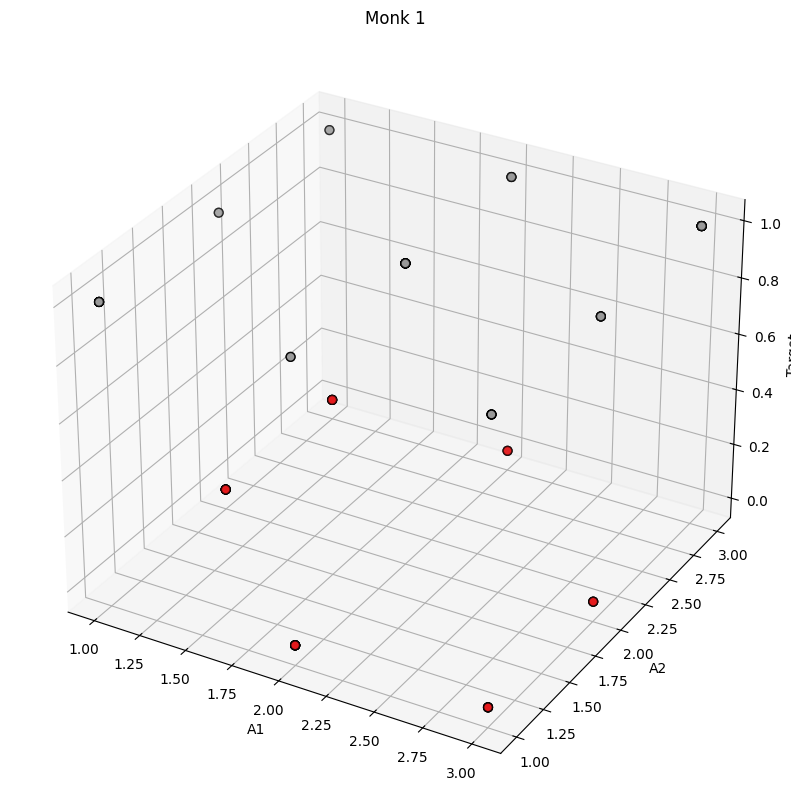

In [11]:
X = monk1_train_data.drop(["target"],axis=1).values
Y = monk1_train_data["target"].values

# 2D
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], Y[:], c=Y)
ax.set_title("MONK 1")
ax.set_xlabel("A1")
ax.set_ylabel("Target")
ax.grid()
plt.show()
#-------------------------------------------------------------------------------
print("\n")
# 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y[:], c=Y, marker="o", cmap=plt.cm.Set1, edgecolor="k", s=40)
ax.set_title("Monk 1")
ax.set_xlabel("A1")
ax.set_ylabel("A2")
ax.set_zlabel("Target")

ax.grid()
plt.show()


## Correlation

In [12]:
def calculate_corr(data,target='target'):
  corr_matrix = data.select_dtypes(exclude=['object']).corr( method='pearson')
  print(corr_matrix)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(corr_matrix, annot=True, linewidth=0.01, square=True, cmap="RdBu", linecolor="black")
  corr_res=corr_matrix[target].sort_values(ascending=False)
  print(corr_res)
  return

### MONK1 correlation

          target        a1        a2        a3        a4        a5        a6
target  1.000000  0.318349  0.079904 -0.080740 -0.107150 -0.437740 -0.032410
a1      0.318349  1.000000 -0.027425  0.016065 -0.095356 -0.173050  0.107691
a2      0.079904 -0.027425  1.000000  0.005806  0.167732  0.029530  0.008417
a3     -0.080740  0.016065  0.005806  1.000000 -0.028785  0.045540  0.053383
a4     -0.107150 -0.095356  0.167732 -0.028785  1.000000  0.055851  0.087135
a5     -0.437740 -0.173050  0.029530  0.045540  0.055851  1.000000  0.088845
a6     -0.032410  0.107691  0.008417  0.053383  0.087135  0.088845  1.000000
target    1.000000
a1        0.318349
a2        0.079904
a6       -0.032410
a3       -0.080740
a4       -0.107150
a5       -0.437740
Name: target, dtype: float64


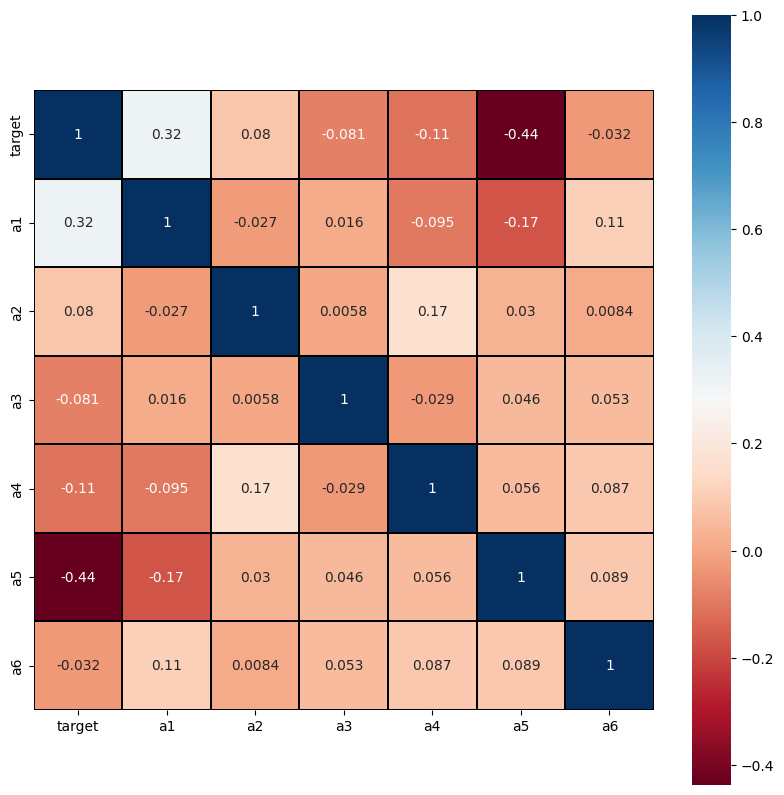

In [13]:
calculate_corr(monk1_train_data,target='target')

### MONK2 Correlation

          target        a1        a2        a3        a4        a5        a6
target  1.000000  0.071296  0.023343 -0.038262  0.138429 -0.036763  0.092972
a1      0.071296  1.000000 -0.092263  0.102045 -0.078680 -0.106705  0.014625
a2      0.023343 -0.092263  1.000000 -0.014421 -0.089225  0.019776 -0.044672
a3     -0.038262  0.102045 -0.014421  1.000000 -0.036809  0.013961 -0.029696
a4      0.138429 -0.078680 -0.089225 -0.036809  1.000000  0.011075  0.064343
a5     -0.036763 -0.106705  0.019776  0.013961  0.011075  1.000000  0.029903
a6      0.092972  0.014625 -0.044672 -0.029696  0.064343  0.029903  1.000000
target    1.000000
a4        0.138429
a6        0.092972
a1        0.071296
a2        0.023343
a5       -0.036763
a3       -0.038262
Name: target, dtype: float64


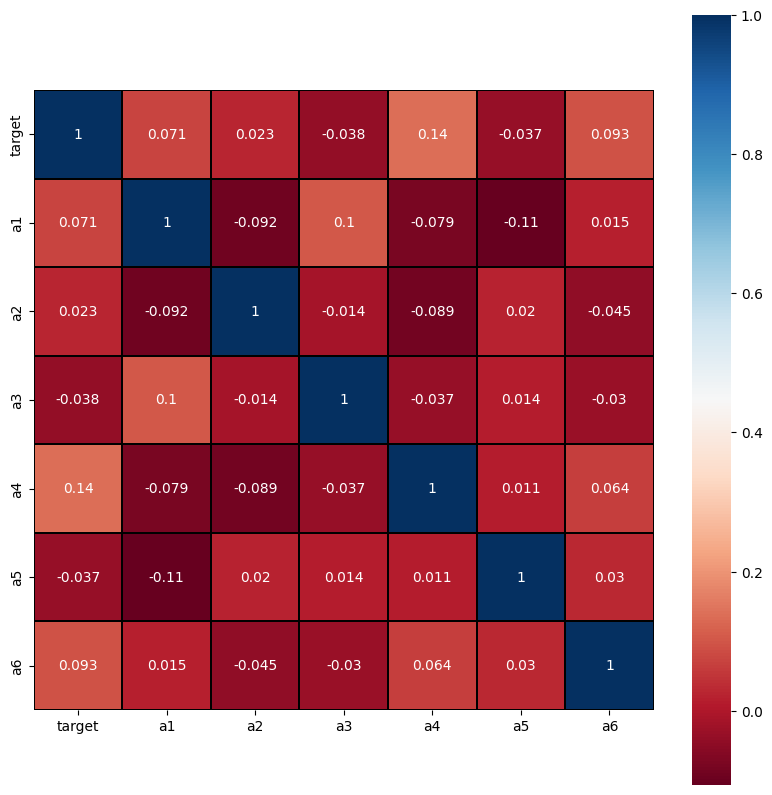

In [14]:
calculate_corr(monk2_train_data,target='target')

          target        a1        a2        a3        a4        a5        a6
target  1.000000 -0.042713 -0.485699 -0.033939 -0.019126 -0.470940  0.098965
a1     -0.042713  1.000000  0.102638 -0.009290  0.029947 -0.003070  0.085460
a2     -0.485699  0.102638  1.000000  0.102792  0.060253  0.045145 -0.081702
a3     -0.033939 -0.009290  0.102792  1.000000  0.002599 -0.015936  0.117219
a4     -0.019126  0.029947  0.060253  0.002599  1.000000 -0.068986 -0.040862
a5     -0.470940 -0.003070  0.045145 -0.015936 -0.068986  1.000000  0.044168
a6      0.098965  0.085460 -0.081702  0.117219 -0.040862  0.044168  1.000000
target    1.000000
a6        0.098965
a4       -0.019126
a3       -0.033939
a1       -0.042713
a5       -0.470940
a2       -0.485699
Name: target, dtype: float64


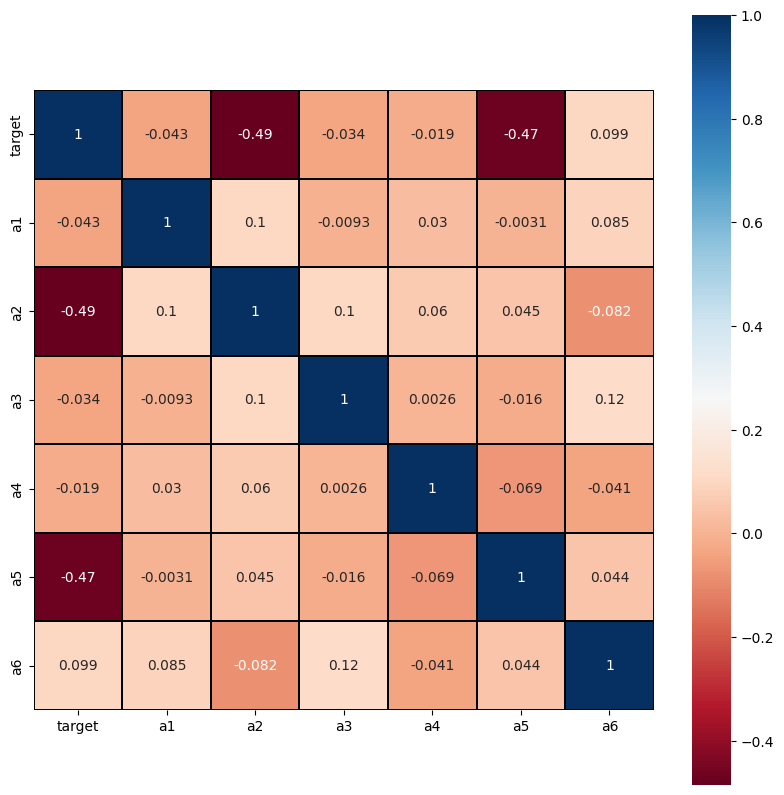

In [15]:
calculate_corr(monk3_train_data,target='target')

# Preprocessing

## Splitting Data
splitting the (TRAINING dataset) into training and validation sets while preserving the proportion of the target in the dataset

In [16]:

from sklearn.model_selection import StratifiedShuffleSplit

# function to split the data to training and validation while preserving the proportion of a specific target in the dataset
def splitData(data,feature):
    #split=1 returns 1 training set and one validation set
    split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    # for loops based on number of splits
    for train_index, validation_index in split.split(data, data[feature]):
        split_train_set = data.loc[train_index]
        split_validation_set = data.loc[validation_index]
    return split_train_set,split_validation_set
    

## Removing id

In [17]:
#function to remove the id column from the data
def removeId(data):
    return data.drop('ID',axis=1,errors='ignore')

## Splitting to target and features

In [18]:
# function to split data to features and target
def splitToFeaturesAndTarget(data):
    X = data.drop(["target"],axis=1).values
    Y = data["target"].values
    return X,Y

## Applying preprocessing

### MONK1

#### removing id

In [19]:
#removing id column from training set
monk1_train_data=removeId(monk1_train_data)


print(monk1_train_data)

     target  a1  a2  a3  a4  a5  a6
0         1   1   1   1   1   3   1
1         1   1   1   1   1   3   2
2         1   1   1   1   3   2   1
3         1   1   1   1   3   3   2
4         1   1   1   2   1   2   1
..      ...  ..  ..  ..  ..  ..  ..
119       1   3   3   2   1   4   2
120       1   3   3   2   3   1   2
121       1   3   3   2   3   2   2
122       1   3   3   2   3   3   2
123       1   3   3   2   3   4   2

[124 rows x 7 columns]


#### One hot Encoding

#### splitiing to train and validation

In [20]:
monk1_split_train_set, monk1_split_validation_set = splitData(monk1_train_data,'target')
print(monk1_split_train_set)
print(monk1_split_validation_set)

     target  a1  a2  a3  a4  a5  a6
4         1   1   1   2   1   2   1
85        0   2   3   2   2   2   1
118       1   3   3   2   1   4   1
70        1   2   2   2   1   1   1
17        0   1   2   1   3   2   1
..      ...  ..  ..  ..  ..  ..  ..
78        0   2   3   1   2   3   1
101       1   3   2   2   1   1   1
87        1   3   1   1   1   1   1
15        0   1   2   1   2   3   2
86        0   2   3   2   3   3   2

[99 rows x 7 columns]
     target  a1  a2  a3  a4  a5  a6
3         1   1   1   1   3   3   2
90        0   3   1   1   2   2   2
111       1   3   3   1   2   4   2
58        0   2   1   2   2   4   2
54        0   2   1   2   1   2   2
108       1   3   3   1   1   2   1
32        0   1   3   1   3   3   1
61        1   2   2   1   1   2   1
91        0   3   1   1   3   2   2
99        1   3   2   1   2   1   2
116       1   3   3   2   1   1   1
18        0   1   2   1   3   4   2
51        0   2   1   1   2   4   1
84        1   2   3   2   2   1   2
5    

#### splitting target feature

In [21]:
monk1_train_X,monk1_train_Y =splitToFeaturesAndTarget(monk1_split_train_set)
print('Training')
print('x\n',monk1_train_X)
print('y\n',monk1_train_Y)


#validation set
monk1_validation_X,monk1_validation_Y =splitToFeaturesAndTarget( monk1_split_validation_set)
print('Test')
print('x\n',monk1_validation_X)
print('y\n',monk1_validation_Y)


Training
x
 [[1 1 2 1 2 1]
 [2 3 2 2 2 1]
 [3 3 2 1 4 1]
 [2 2 2 1 1 1]
 [1 2 1 3 2 1]
 [3 2 2 3 2 1]
 [1 3 2 2 4 2]
 [3 1 2 3 2 2]
 [2 3 2 1 3 2]
 [1 1 1 1 3 1]
 [3 3 1 3 1 2]
 [3 2 1 2 4 2]
 [3 3 1 2 3 2]
 [2 1 1 2 2 2]
 [1 1 2 2 4 1]
 [3 2 1 1 1 1]
 [1 3 1 2 2 1]
 [3 1 1 2 1 1]
 [2 1 1 2 1 2]
 [1 1 2 3 1 2]
 [2 2 2 1 3 2]
 [1 1 1 3 2 1]
 [1 3 1 1 4 1]
 [1 2 2 2 3 2]
 [3 3 1 1 1 1]
 [3 1 2 1 2 2]
 [3 2 2 1 1 2]
 [1 2 1 2 3 1]
 [2 2 1 3 1 2]
 [1 2 2 2 4 2]
 [3 3 2 3 2 2]
 [1 3 1 3 1 2]
 [1 2 1 2 1 1]
 [1 1 2 2 3 1]
 [2 3 1 3 3 1]
 [2 2 2 1 4 2]
 [2 3 1 3 1 2]
 [3 3 1 1 4 2]
 [1 3 1 3 4 1]
 [1 2 2 3 2 2]
 [3 3 2 3 1 2]
 [2 1 2 1 3 1]
 [2 2 1 3 2 2]
 [2 1 2 3 4 1]
 [3 3 2 1 3 2]
 [2 2 1 3 3 2]
 [3 3 2 1 4 2]
 [1 3 1 1 2 1]
 [2 1 1 1 3 2]
 [1 3 1 3 2 2]
 [3 3 2 3 3 2]
 [3 1 2 2 3 2]
 [1 3 2 3 4 2]
 [1 2 2 1 2 2]
 [2 3 1 1 1 1]
 [1 2 1 1 1 2]
 [3 1 1 1 1 2]
 [2 1 1 2 1 1]
 [2 1 1 2 4 2]
 [3 3 1 3 2 2]
 [3 3 1 3 4 2]
 [1 2 1 1 3 1]
 [2 2 1 3 4 2]
 [3 2 1 1 4 2]
 [3 1 2 2 2 2]
 [3 2 2 3 1 1

### Monk2

#### removing id

In [22]:
#removing id column for both training and testing sets
monk2_train_data=removeId(monk2_train_data)

print(monk2_train_data)

     target  a1  a2  a3  a4  a5  a6
0         0   1   1   1   1   2   2
1         0   1   1   1   1   4   1
2         0   1   1   1   2   1   1
3         0   1   1   1   2   1   2
4         0   1   1   1   2   2   1
..      ...  ..  ..  ..  ..  ..  ..
164       0   3   3   2   2   3   1
165       0   3   3   2   2   3   2
166       1   3   3   2   3   1   1
167       0   3   3   2   3   2   1
168       0   3   3   2   3   4   2

[169 rows x 7 columns]


#### One hot encoding

#### Splitting to training and validation

In [23]:
monk2_split_train_set, monk2_split_validation_set = splitData(monk2_train_data,'target')
print(monk2_split_train_set)
print(monk2_split_validation_set)

     target  a1  a2  a3  a4  a5  a6
0         0   1   1   1   1   2   2
161       0   3   3   2   1   1   1
148       0   3   2   2   1   3   2
157       0   3   3   1   1   2   1
89        0   2   2   2   2   3   1
..      ...  ..  ..  ..  ..  ..  ..
50        0   1   3   2   1   3   1
34        1   1   2   2   3   1   2
159       1   3   3   1   1   3   2
64        0   2   1   1   3   4   1
37        1   1   2   2   3   4   1

[135 rows x 7 columns]
     target  a1  a2  a3  a4  a5  a6
16        0   1   2   1   1   1   2
145       0   3   2   2   1   1   1
152       0   3   2   2   2   3   2
30        0   1   2   2   1   4   1
105       1   2   3   2   1   2   1
31        1   1   2   2   2   3   1
96        1   2   3   1   1   3   2
25        0   1   2   1   3   3   1
1         0   1   1   1   1   4   1
55        0   1   3   2   2   4   2
156       0   3   3   1   1   1   1
108       1   2   3   2   2   1   1
116       1   3   1   1   2   2   2
28        1   1   2   1   3   4   2
144 

#### Splitting to features and Target

In [24]:
monk2_train_X,monk2_train_Y =splitToFeaturesAndTarget(monk2_split_train_set)
print('Training')
print('x\n',monk2_train_X)
print('y\n',monk2_train_Y)

monk2_validation_X,monk2_validation_Y =splitToFeaturesAndTarget( monk2_split_validation_set)
print('Test')
print('x\n',monk2_validation_X)
print('y\n',monk2_validation_Y)


Training
x
 [[1 1 1 1 2 2]
 [3 3 2 1 1 1]
 [3 2 2 1 3 2]
 [3 3 1 1 2 1]
 [2 2 2 2 3 1]
 [3 1 1 3 1 2]
 [1 3 1 1 1 2]
 [2 1 1 3 2 2]
 [2 3 1 2 4 2]
 [3 3 2 2 1 1]
 [2 3 2 2 2 1]
 [2 2 2 1 3 2]
 [2 1 1 1 3 1]
 [2 3 2 2 3 2]
 [3 2 2 3 4 2]
 [2 2 2 1 1 1]
 [2 1 2 3 2 2]
 [3 3 2 2 2 1]
 [1 1 1 3 2 1]
 [3 1 2 1 1 1]
 [1 3 1 3 2 2]
 [3 1 2 3 2 2]
 [2 3 2 3 3 1]
 [1 3 2 3 2 1]
 [1 1 1 2 1 2]
 [2 3 2 1 1 2]
 [3 2 2 2 2 1]
 [3 2 2 1 3 1]
 [1 2 1 2 3 1]
 [2 2 2 3 1 1]
 [3 3 2 2 3 1]
 [2 1 2 2 4 2]
 [3 1 1 2 4 2]
 [2 1 2 1 1 1]
 [3 1 1 2 4 1]
 [2 1 1 2 2 2]
 [2 2 2 1 2 2]
 [2 2 2 3 2 1]
 [1 3 1 1 2 2]
 [2 3 1 3 4 1]
 [3 2 1 3 1 1]
 [1 2 2 1 2 1]
 [2 1 2 1 4 1]
 [2 3 1 2 3 1]
 [3 3 1 1 3 1]
 [3 3 1 2 3 2]
 [1 2 1 3 1 2]
 [1 3 1 3 3 1]
 [1 1 2 3 2 2]
 [2 1 1 1 2 2]
 [3 3 2 3 2 1]
 [1 3 2 1 4 1]
 [1 2 1 3 3 2]
 [3 3 2 3 4 2]
 [2 3 2 1 3 1]
 [1 3 2 2 3 2]
 [2 3 2 1 4 2]
 [3 2 2 2 2 2]
 [2 3 2 3 4 2]
 [3 1 2 1 4 2]
 [3 1 2 1 3 1]
 [3 2 1 1 1 2]
 [1 1 1 3 4 1]
 [1 2 2 3 4 2]
 [1 1 2 2 4 2]
 [3 1 1 3 3 2

### Monk3

#### removing id

In [25]:
#removing id column for both training and testing sets
monk3_train_data=removeId(monk3_train_data)

print(monk3_train_data)

     target  a1  a2  a3  a4  a5  a6
0         1   1   1   1   1   1   2
1         1   1   1   1   1   2   1
2         1   1   1   1   1   2   2
3         0   1   1   1   1   3   1
4         0   1   1   1   1   4   1
..      ...  ..  ..  ..  ..  ..  ..
117       0   3   3   2   2   2   2
118       0   3   3   2   2   3   2
119       0   3   3   2   3   1   1
120       0   3   3   2   3   3   2
121       0   3   3   2   3   4   2

[122 rows x 7 columns]


#### One Hot Encoding

#### Splitting to training and Validation

In [26]:
monk3_split_train_set, monk3_split_validation_set = splitData(monk3_train_data,'target')
print(monk3_split_train_set)
print(monk3_split_validation_set)

     target  a1  a2  a3  a4  a5  a6
77        0   2   3   1   2   2   2
119       0   3   3   2   3   1   1
48        1   2   1   1   1   1   1
22        1   1   2   1   3   1   2
103       1   3   2   2   1   3   2
..      ...  ..  ..  ..  ..  ..  ..
37        0   1   3   1   2   3   2
21        1   1   2   1   3   1   1
89        1   3   1   1   1   2   1
11        0   1   1   2   2   4   1
82        0   2   3   2   1   4   1

[97 rows x 7 columns]
     target  a1  a2  a3  a4  a5  a6
5         1   1   1   1   2   1   1
81        0   2   3   2   1   2   2
97        1   3   1   2   3   1   1
40        0   1   3   1   3   3   1
46        0   1   3   2   2   4   2
92        1   3   1   1   3   1   2
26        0   1   2   1   3   4   1
23        1   1   2   1   3   2   1
36        0   1   3   1   1   4   1
72        1   2   2   2   2   3   2
101       1   3   2   1   3   1   2
85        0   2   3   2   3   1   1
51        0   2   1   1   1   4   2
62        1   2   2   1   2   1   2
8    

#### Splitting to features and target

In [27]:
monk3_train_X,monk3_train_Y =splitToFeaturesAndTarget(monk3_split_train_set)
print('Training')
print('x\n',monk3_train_X)
print('y\n',monk3_train_Y)

monk3_validation_X,monk3_validation_Y =splitToFeaturesAndTarget( monk3_split_validation_set)
print('Test')
print('x\n',monk3_validation_X)
print('y\n',monk3_validation_Y)


Training
x
 [[2 3 1 2 2 2]
 [3 3 2 3 1 1]
 [2 1 1 1 1 1]
 [1 2 1 3 1 2]
 [3 2 2 1 3 2]
 [2 1 1 2 1 1]
 [2 1 1 1 1 2]
 [1 3 2 1 2 1]
 [1 2 1 3 3 2]
 [2 3 1 2 1 1]
 [1 1 1 1 1 2]
 [1 2 1 2 3 1]
 [1 1 2 3 3 2]
 [2 3 1 2 3 2]
 [2 1 1 3 3 2]
 [2 1 2 3 1 2]
 [3 3 1 3 4 1]
 [1 2 2 2 1 1]
 [3 1 1 1 1 1]
 [2 3 2 3 2 1]
 [2 1 1 2 1 2]
 [1 3 2 1 1 2]
 [1 3 1 1 2 1]
 [1 3 2 1 1 1]
 [3 3 1 3 2 1]
 [1 1 2 1 4 2]
 [1 2 2 1 3 1]
 [3 2 2 3 3 2]
 [2 2 1 1 4 2]
 [1 1 2 3 1 2]
 [1 2 1 1 3 1]
 [1 1 2 2 2 2]
 [3 1 1 2 4 2]
 [2 1 1 3 2 2]
 [2 2 2 1 2 2]
 [3 1 2 1 2 1]
 [1 3 1 2 4 1]
 [3 2 2 3 1 1]
 [1 1 1 2 4 2]
 [3 2 2 2 1 2]
 [2 3 2 1 1 2]
 [2 2 1 3 2 2]
 [3 3 1 1 4 1]
 [1 2 2 2 2 2]
 [2 2 1 2 2 1]
 [3 3 2 1 1 1]
 [1 3 2 2 3 2]
 [3 2 2 1 2 2]
 [2 2 1 3 4 2]
 [3 3 2 2 3 2]
 [1 2 2 1 4 2]
 [1 2 2 2 2 1]
 [1 1 2 3 3 1]
 [3 1 2 2 3 2]
 [1 2 2 3 2 2]
 [3 2 1 1 4 1]
 [3 2 1 1 2 2]
 [3 2 1 2 3 1]
 [1 3 2 3 4 1]
 [1 1 2 3 1 1]
 [3 3 2 1 1 2]
 [3 3 1 3 2 2]
 [2 2 2 3 4 1]
 [1 2 1 2 2 1]
 [1 1 1 2 2 2]
 [2 3 2 2 3 1

## Cross Validation

In [28]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

def custom_cross_validation(model, X, y,epoch=None, num_folds=5,):
    """
    Perform stratified k-fold cross-validation

    Parameters:    - model: model object.
    - X: samples.
    - y: target.
    - num_folds: Number of cross-validation folds.
    - epoch: number of epoch
    Returns:
    - fold_accuracies: List of accuracy scores for each fold.
    - mean_accuracy: Mean accuracy across all folds.
    """

    X, y = np.array(X), np.array(y)

    # Initialize stratified k-fold
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    fold_accuracies = []
    
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold {fold + 1}/{num_folds}")
        
        # Split data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        print('train size: ',len(X_train))
        print('test size: ',len(X_test))

        # Train the model
        if epoch is not None:
            model.fit(X_train, y_train.reshape(-1, 1), epochs=epoch)
        else:
            model.fit(X_train, y_train.reshape(-1, 1))  
        
        # Evaluate the model on the test set
        predictions = model.predict(X_test)
        accuracy = np.mean(predictions.flatten() == y_test.flatten())
        
        print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")
        print('--------------------------------------------')
        fold_accuracies.append(accuracy)

    # Calculate mean accuracy
    mean_accuracy = np.mean(fold_accuracies)


    # Return fold accuracies and the mean accuracy
    return  mean_accuracy, fold_accuracies


# Training

In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay

def customClassificationReport(trueValue, predictedValues):
    print("Classification report:\n", metrics.classification_report(trueValue, predictedValues, zero_division=0))
    
    cm = confusion_matrix(y_true=trueValue, y_pred=predictedValues)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    disp.figure_.suptitle("Confusion Matrix")
    plt.show()
    
    print('Accuracy: ', accuracy_score(trueValue, predictedValues))
    print('Precision: ', precision_score(trueValue, predictedValues, average='weighted', zero_division=0))
    print('Recall: ', recall_score(trueValue, predictedValues, average='weighted', zero_division=0))
    print('F1: ', f1_score(trueValue, predictedValues, average='weighted', zero_division=0))


In [30]:
print(monk1_train_X.shape)
print(monk1_train_Y.shape)
print('--------------')
print(monk1_validation_X.shape)
print(monk1_validation_Y.shape)

(99, 6)
(99,)
--------------
(25, 6)
(25,)


## SVM

Fold 1/5
train size:  79
test size:  20
Fold 1 Accuracy: 0.7000
--------------------------------------------
Fold 2/5
train size:  79
test size:  20
Fold 2 Accuracy: 0.8000
--------------------------------------------
Fold 3/5
train size:  79
test size:  20
Fold 3 Accuracy: 0.6500
--------------------------------------------
Fold 4/5
train size:  79
test size:  20
Fold 4 Accuracy: 0.6000
--------------------------------------------
Fold 5/5
train size:  80
test size:  19
Fold 5 Accuracy: 0.6842
--------------------------------------------
Mean accuracy cross validation:  0.6868421052631579
Accuracies cross validation:  [0.7, 0.8, 0.65, 0.6, 0.6842105263157895]
Classification report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.67      0.67      0.67        12

    accuracy                           0.68        25
   macro avg       0.68      0.68      0.68        25
weighted avg       0.68      0.68  

c:\Users\Mary\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mary\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mary\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Mary\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConve

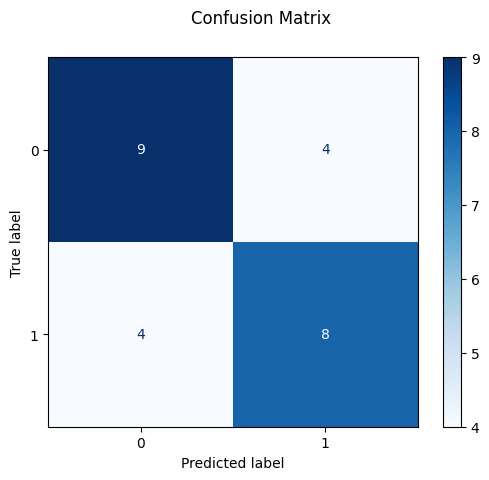

Accuracy:  0.68
Precision:  0.68
Recall:  0.68
F1:  0.68


In [31]:

from sklearn import svm, metrics

# Create a classifier: a support vector classifier

# svm_classifier = svm.SVC()
# svm_classifier = svm.SVC(kernel="linear")
# svm_classifier = svm.SVC(kernel="poly", degree=10, C=100, gamma=0.01)
svm_classifier = svm.SVC(kernel="sigmoid", C=12, gamma=0.01)
# svm_classifier = svm.SVC(kernel="rbf", C=100, gamma=0.001)

# Train the classifier with cross validation
mean_accuracy,accuracies=custom_cross_validation(svm_classifier,monk1_train_X, monk1_train_Y)
print('Mean accuracy cross validation: ',mean_accuracy)
print('Accuracies cross validation: ',accuracies)

monk1_validation_svm_predicted = svm_classifier.predict(monk1_validation_X)

customClassificationReport(monk1_validation_Y,monk1_validation_svm_predicted)



## Grid Search

In [32]:
from enum import Enum

class ActivationType(Enum):
    SIGMOID = "sigmoid"
    RELU = "relu"
    TANH = "tanh"

In [56]:
import random


class Search:
    """Class to perform manual grid search and random search"""

    def __init__(self, model, param_grid, scoring_function, activation_type):
        self.model = model
        self.param_grid = param_grid
        self.scoring_function = scoring_function
        self.activation_type = activation_type


    def grid_search(self, X, y, epoch=100, neurons=[1]):
        best_score = -float("inf")
        best_params = None

        # Iterate over all possible combinations
        for learning_rate in self.param_grid["learning_rate"]:
            for momentum in self.param_grid["momentum"]:
                for lambd in self.param_grid["lambd"]:
                    # Dynamically create a new model instance with new parameter
                    model = self.model(
                        input_size=6,
                        hidden_layers=neurons,
                        output_size=1,
                        activationType=self.activation_type,
                        learning_rate=learning_rate,
                        momentum=momentum,
                        lambd=lambd,
                    )

                    # Train the model
                    mean_accuracy,accuracies=custom_cross_validation(model,X, y,epoch= epoch)
                    # model.fit(X, y, epochs=epoch)  

                    # Evaluate the model
                    # score = self.scoring_function(
                    #     model, X, y
                    # )  # Pass the dynamically created model
                    score=mean_accuracy
                    print(
                        f"Learning Rate: {learning_rate}, Momentum: {momentum}, Lambda: {lambd}, Score: {score}"
                    )
                    print("-----------------------------------------------------")

                    # Update the best score and parameters
                    if score > best_score:
                        best_score = score
                        best_params = {
                            "learning_rate": learning_rate,
                            "momentum": momentum,
                            "lambd": lambd,
                        }

        return best_params, best_score



    import random

    def random_grid_search(self, X, y, n_iter=10, epoch=100, neurons=[1]):
        """Perform random grid search, including patience as a parameter."""

        best_score = -float("inf")
        best_params = None

        # Randomly sample `n_iter` distinct parameters from each grid
        sampled_learning_rates = random.sample(
            self.param_grid["learning_rate"],
            min(n_iter, len(self.param_grid["learning_rate"])),
        )
        sampled_momentum = random.sample(
            self.param_grid["momentum"], min(n_iter, len(self.param_grid["momentum"]))
        )
        sampled_lambd = random.sample(
            self.param_grid["lambd"], min(n_iter, len(self.param_grid["lambd"]))
        )

        for learning_rate in sampled_learning_rates:
            for momentum in sampled_momentum:
                for lambd in sampled_lambd:
                    
                    # Dynamically create a new model instance for each combination of parameters
                    model = self.model(
                        input_size=6,
                        hidden_layers=neurons,
                        output_size=1,
                        activationType=self.activation_type,
                        learning_rate=learning_rate,
                        momentum=momentum,
                        lambd=lambd,
                    )

                    # Train the model with cross validation
                    mean_accuracy,accuracies=custom_cross_validation(model,X, y,epoch= epoch)
                    # model.fit(X, y, epochs=epoch)

                    # Evaluate the model
                    # score = self.scoring_function(model, X, y)
                    score=mean_accuracy
                    print(
                        f"Learning Rate: {learning_rate}, Momentum: {momentum}, Lambda: {lambd}, Score: {score}"
                    )
                    print("-----------------------------------------------------")

                    # Update the best score and parameters
                    if score > best_score:
                        best_score = score
                        best_params = {
                            "learning_rate": learning_rate,
                            "momentum": momentum,
                            "lambd": lambd,
                            
                        }

        return best_params, best_score

## Custom Neural Network from Scratch

In [37]:

class CustomNeuralNetwork:
    
    def __init__(self, input_size, hidden_layers, output_size, activationType, learning_rate, momentum, lambd):
        """
        Initialize the neural network.
        input_size: Number of input features.
        hidden_layers: List of neurons in each hidden layer.
        output_size: Number of output neurons (1 for binary classification).
        activationType: Type of Activation (relu, sigmoid)
        learning_rate: Learning rate for gradient descent.
        """ 
        
        self.activationType=activationType
        
        self.learning_rate=learning_rate
        self.momentum = momentum
        self.regularization = lambd
        
        # list containing the number of neurons in each layer
        self.layers = [input_size] + hidden_layers + [output_size]
        print(self.layers)

        # Initialize weights 
        # generates a matrix of random values from a normal distribution with mean 0 and variance 1. 
        # The matrix has [self.layers[i] rows] (the number of neurons in layer i) and [self.layers[i+1] columns] (the number of neurons in layer i+1).
        self.weights = [np.random.randn(self.layers[i], self.layers[i+1]) * 0.1 for i in range(len(self.layers) - 1)]
        
        
        # Initialize bias (bias for each node in each hidden layer and the output layer)
        self.biases = [np.zeros((1, self.layers[i+1])) for i in range(len(self.layers) - 1)]
        
        self.previous_updates_w = [np.zeros_like(w) for w in self.weights]
        self.previous_updates_b = [np.zeros_like(b) for b in self.biases]
        
        
    """Sigmoid activation function."""    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    """Derivative of sigmoid for backpropagation."""
    @staticmethod
    def sigmoid_derivative(x):
        return x * (1 - x)
    
    """Tanh activation function"""
    @staticmethod
    def tanh(x):
        return np.tanh(x)
    
    """Derivative of tanh activation function"""
    @staticmethod
    def tanh_derivative(x):
        return 1 - np.tanh(x) ** 2
    
    """ReLU activation function."""
    @staticmethod
    def relu(x):
        return np.maximum(0, x)
    
    """Derivative of ReLU for backpropagation."""
    @staticmethod
    def relu_derivative(x):
        return (x > 0).astype(float)
    
    
    """ function to apply the appropriate activation function based on the passed parameter of the activation type"""
    def apply_activationFunction(self,z):
        if self.activationType==ActivationType.SIGMOID:
            return self.sigmoid(z)
        if self.activationType==ActivationType.RELU:
            return self.relu(z)
        if self.activationType==ActivationType.TANH:
            return self.tanh(z)
        
    
    
    """ function to calculate the derivative of the appropriate activation function based on the passed parameter of the activation type"""
    def derivative_activationFunction(self,afterActivation):
        if self.activationType==ActivationType.SIGMOID:
            return self.sigmoid_derivative(afterActivation)
        if self.activationType==ActivationType.RELU:
            return self.relu_derivative(afterActivation)
        if self.activationType==ActivationType.TANH:
            return self.tanh_derivative(afterActivation)
        

    """Perform forward propagation."""
    def forward(self, X):
        # This list will store the pre-activation values (z) for each layer.
        self.beforeActivationOutput = [X]
        
        # This list stores the post-activation values (a) for each layer
        self.afterActivationOutput = [X]
        
        for w, b in zip(self.weights, self.biases):
            #calculate the output of the layer by multiplying the output of the previous layer by the weights, then adding the biases
            z = np.dot(self.afterActivationOutput[-1], w) + b
            
            # applying the activation function
            a = self.apply_activationFunction(z)
            
            # append the results 
            self.beforeActivationOutput.append(z)
            self.afterActivationOutput.append(a)
            
        # returning the final output of each instance    
        return self.afterActivationOutput[-1]
    


    """Perform backward propagation."""
    def backward(self, X, y):
        output_error = self.afterActivationOutput[-1] - y
        errors = [output_error]
    
        # Backpropagate errors through each layer
        for i in range(len(self.weights) - 1, 0, -1):
            error = np.dot(errors[0], self.weights[i].T) * self.derivative_activationFunction(self.afterActivationOutput[i])
            errors.insert(0, error)
    
        # Update weights and biases using gradient descent
        for i in range(len(self.weights)):
            # Compute gradients
            weight_gradient = np.dot(self.afterActivationOutput[i].T, errors[i])
            bias_gradient = np.sum(errors[i], axis=0, keepdims=True)
    
            # Normalize gradients
            weight_gradient /= X.shape[0]
            bias_gradient /= X.shape[0]
    
            # Apply regularization (weight decay)
            weight_gradient += self.regularization * self.weights[i]
    
            # Apply momentum and calculate updates
            weight_update = self.learning_rate * weight_gradient + self.momentum * self.previous_updates_w[i]
            bias_update = self.learning_rate * bias_gradient + self.momentum * self.previous_updates_b[i]
    
            # Update weights and biases
            self.weights[i] -= weight_update  # Nota: il segno è invertito qui
            self.biases[i] -= bias_update
    
            # Store the updates for the next iteration
            self.previous_updates_w[i] = weight_update
            self.previous_updates_b[i] = bias_update


    """Train the neural network."""
    def fit(self, X, y, epochs=1000):
        # to store the loss for each epoch
        history = {'train_loss': [], 'train_acc': [], 'epoch': []}
    
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            
            # Calculate loss (Mean Squared Error + Regularization)
            loss = np.mean((self.afterActivationOutput[-1] - y) ** 2) + self.regularization * np.sum([np.sum(w ** 2) for w in self.weights])
            
            if epoch % 50 == 0:              
                train_predictions = (self.afterActivationOutput[-1] > 0.5).astype(int)
                train_acc = np.mean(train_predictions == y)
                # Store loss and training accuracy
                history['train_loss'].append(loss)
                history['train_acc'].append(train_acc)
                history['epoch'].append(epoch)
        return history
    
    
    """def fit(self, X, y, epochs=1000):
        # to store the loss for each epoch
        history = {'loss': [], 'train_acc': [], 'epoch': []}
        
        best_loss = float('inf')
        patience_counter = 0
    
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            
            # Calculate loss (Mean Squared Error + Regularization)
            loss = np.mean((self.afterActivationOutput[-1] - y) ** 2) + self.regularization * np.sum([np.sum(w ** 2) for w in self.weights])
            
            if epoch % 50 == 0:              
                train_predictions = (self.afterActivationOutput[-1] > 0.5).astype(int)
                train_acc = np.mean(train_predictions == y)
                # Store loss and training accuracy
                history['loss'].append(loss)
                history['train_acc'].append(train_acc)
                history['epoch'].append(epoch)
                
            # Check for improvement
            if loss < best_loss:
                best_loss = loss
                patience_counter = 0 # Reset the counter
            else:
                patience_counter +=1
                
            if patience_counter >= self.patience:
                print(f"Early stopping at epoch {epoch}, Loss: {loss}")
                break
            
        return history"""



    def predict(self, X):
        """Make predictions using the trained model."""
        return (self.forward(X) > 0.5).astype(int)





## MONK 1

In [57]:


X = monk1_train_X
y = monk1_train_Y.reshape(-1, 1)  



# Define the parameter grid 
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate values
    'momentum': [0.7, 0.8, 0.9],              # Momentum values
    'lambd': [0.0, 0.001, 0.01],              # Regularization lambda values
}


# Scoring function for the neural network
def accuracy_score_custom(nn_model, X, y):
    predictions = nn_model.predict(X)
    predictions = (predictions > 0.5).astype(int)  
    return np.mean(predictions == y)



# Initialize the Search class for grid search
search = Search(CustomNeuralNetwork, param_grid, accuracy_score_custom, activation_type= ActivationType.SIGMOID)

# Perform grid search on the learning rate
print("Performing Grid Search...")
best_params, best_score = search.grid_search(X, y, epoch=500, neurons= [3])
print(f"Best Parameters:\n {best_params}, Best Score: {best_score}")


Performing Grid Search...
[6, 3, 1]
Fold 1/5
train size:  79
test size:  20
Fold 1 Accuracy: 0.6000
--------------------------------------------
Fold 2/5
train size:  79
test size:  20
Fold 2 Accuracy: 0.8500
--------------------------------------------
Fold 3/5
train size:  79
test size:  20
Fold 3 Accuracy: 0.6000
--------------------------------------------
Fold 4/5
train size:  79
test size:  20
Fold 4 Accuracy: 0.6500
--------------------------------------------
Fold 5/5
train size:  80
test size:  19
Fold 5 Accuracy: 0.6842
--------------------------------------------
Learning Rate: 0.01, Momentum: 0.7, Lambda: 0.0, Score: 0.6768421052631578
-----------------------------------------------------
[6, 3, 1]
Fold 1/5
train size:  79
test size:  20
Fold 1 Accuracy: 0.5500
--------------------------------------------
Fold 2/5
train size:  79
test size:  20
Fold 2 Accuracy: 0.8000
--------------------------------------------
Fold 3/5
train size:  79
test size:  20
Fold 3 Accuracy: 0.600

[6, 3, 1]


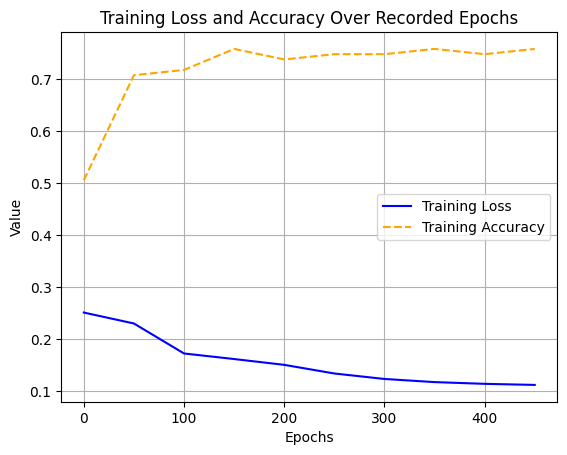

Predicting validation set
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.85      0.79        13
           1       0.80      0.67      0.73        12

    accuracy                           0.76        25
   macro avg       0.77      0.76      0.76        25
weighted avg       0.77      0.76      0.76        25



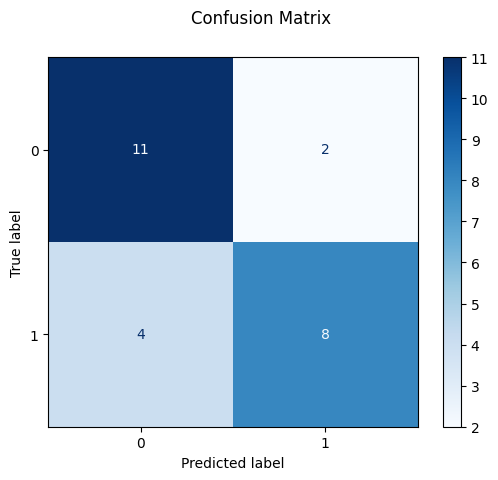

Accuracy:  0.76
Precision:  0.7653333333333333
Recall:  0.76
F1:  0.7576623376623377


In [60]:

# Define the network with dynamic hidden layers
nn1 = CustomNeuralNetwork(input_size=6, 
                         hidden_layers=[3,],
                         output_size=1,
                         activationType=ActivationType.SIGMOID,
                         learning_rate=best_params['learning_rate'],
                         momentum=best_params['momentum'],
                         lambd=best_params['lambd'],
                         )



# Train the network 
history = nn1.fit(X, y, epochs=500)

# Plot a single graph with Loss and Training Accuracy
plt.figure()

# Plot Training Loss
plt.plot(history['epoch'], history['train_loss'], label='Training Loss', color='blue', linestyle='-')

# Plot Training Accuracy
plt.plot(history['epoch'], history['train_acc'], label='Training Accuracy', color='orange', linestyle='--')

# Configure the plot
plt.xlabel('Epochs')  # X-axis as the recorded epochs
plt.ylabel('Value')  # Shared y-axis label
plt.title('Training Loss and Accuracy Over Recorded Epochs')
plt.legend()  
plt.grid(True)

# Display the plot
plt.show()

# Validation predictions
print('Predicting validation set')
monk1_validation_nn_predictions = nn1.predict(monk1_validation_X)
customClassificationReport(monk1_validation_Y, monk1_validation_nn_predictions)

In [41]:
# Comparison of the actual results with the predicted results
print("-----------------------------------------------------------------------")
monk1_act_vs_pred = pd.DataFrame({"Actual": monk1_validation_Y.flatten(), "Predicted":  monk1_validation_nn_predictions.flatten()})
print(monk1_act_vs_pred)

-----------------------------------------------------------------------
    Actual  Predicted
0        1          1
1        0          0
2        1          1
3        0          0
4        0          0
5        1          1
6        0          0
7        1          1
8        0          0
9        1          1
10       1          1
11       0          0
12       0          0
13       1          1
14       1          1
15       1          1
16       0          0
17       0          0
18       1          1
19       1          1
20       0          0
21       0          0
22       1          1
23       0          0
24       0          0


### MONK2

In [61]:
X = monk2_train_X
y = monk2_train_Y.reshape(-1, 1)  


# Define the parameter grid 
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate values
    'momentum': [0.7, 0.8, 0.9],              # Momentum values
    'lambd': [0.0, 0.001, 0.01],              # Regularization lambda values
   
}


# Scoring function for the neural network
def accuracy_score_custom(nn_model, X, y):
    predictions = nn_model.predict(X)
    predictions = (predictions > 0.5).astype(int)  
    return np.mean(predictions == y)

# Initialize the Search class for grid search
search = Search(CustomNeuralNetwork, param_grid, accuracy_score_custom, activation_type= ActivationType.SIGMOID)

# Perform grid search on the learning rate
print("Performing Grid Search...")
best_params, best_score = search.random_grid_search(X, y, epoch=500, neurons= [2])
print(f"Best Parameters: {best_params}, Best Score: {best_score}")


Performing Grid Search...
[6, 2, 1]
Fold 1/5
train size:  108
test size:  27
Fold 1 Accuracy: 0.6296
--------------------------------------------
Fold 2/5
train size:  108
test size:  27
Fold 2 Accuracy: 0.6296
--------------------------------------------
Fold 3/5
train size:  108
test size:  27
Fold 3 Accuracy: 0.5556
--------------------------------------------
Fold 4/5
train size:  108
test size:  27
Fold 4 Accuracy: 0.4444
--------------------------------------------
Fold 5/5
train size:  108
test size:  27
Fold 5 Accuracy: 0.5926
--------------------------------------------
Learning Rate: 0.05, Momentum: 0.8, Lambda: 0.001, Score: 0.5703703703703704
-----------------------------------------------------
[6, 2, 1]
Fold 1/5
train size:  108
test size:  27
Fold 1 Accuracy: 0.6296
--------------------------------------------
Fold 2/5
train size:  108
test size:  27
Fold 2 Accuracy: 0.6296
--------------------------------------------
Fold 3/5
train size:  108
test size:  27
Fold 3 Accur

[6, 2, 1]


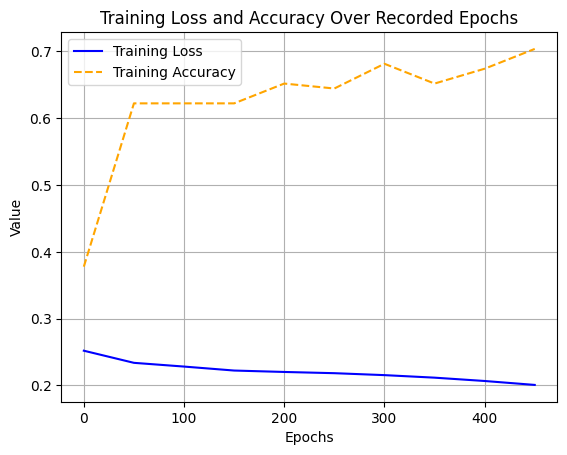

Classification report:
               precision    recall  f1-score   support

           0       0.58      0.67      0.62        21
           1       0.30      0.23      0.26        13

    accuracy                           0.50        34
   macro avg       0.44      0.45      0.44        34
weighted avg       0.47      0.50      0.48        34



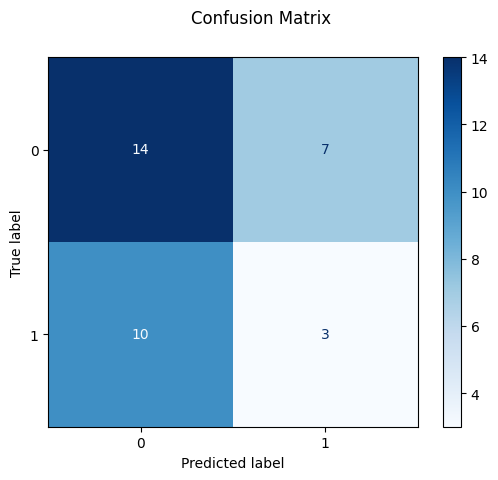

Accuracy:  0.5
Precision:  0.475
Recall:  0.5
F1:  0.4840579710144927


In [62]:

# Define the network with dynamic hidden layers
nn2 = CustomNeuralNetwork(input_size=6, 
                         hidden_layers=[2],
                         output_size=1,
                         activationType=ActivationType.SIGMOID,
                         learning_rate=best_params['learning_rate'],
                         momentum=best_params['momentum'],
                         lambd=best_params['lambd'],
                        
                         )

# Train the network
history = nn2.fit(X, y, epochs=500)

# Plot a single graph with Loss and Training Accuracy
plt.figure()

# Plot Training Loss
plt.plot(history['epoch'], history['train_loss'], label='Training Loss', color='blue', linestyle='-')

# Plot Training Accuracy
plt.plot(history['epoch'], history['train_acc'], label='Training Accuracy', color='orange', linestyle='--')

# Configure the plot
plt.xlabel('Epochs')  # X-axis as the recorded epochs
plt.ylabel('Value')  # Shared y-axis label
plt.title('Training Loss and Accuracy Over Recorded Epochs')
plt.legend()  # Display legend
plt.grid(True)

# Display the plot
plt.show()


# Test predictions
monk2_test_nn_predictions = nn2.predict(monk2_validation_X)
customClassificationReport(monk2_validation_Y, monk2_test_nn_predictions)

### MONK3


In [63]:
X = monk3_train_X
y = monk3_train_Y.reshape(-1, 1)  


# Define the parameter grid 
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate values
    'momentum': [0.7, 0.8, 0.9],              # Momentum values
    'lambd': [0.001, 0.005, 0.01, 0.02],              # Regularization lambda values
   
}

# Scoring function for the neural network
def accuracy_score_custom(nn_model, X, y):
    predictions = nn_model.predict(X)
    predictions = (predictions > 0.5).astype(int)  
    return np.mean(predictions == y)

# Initialize the Search class for grid search
search = Search(CustomNeuralNetwork, param_grid, accuracy_score_custom, activation_type= ActivationType.SIGMOID)

# Perform grid search on the learning rate
print("Performing Grid Search...")
best_params, best_score = search.random_grid_search(X, y, epoch=2500, neurons= [4])
print(f"Best Parameters: {best_params}, Best Score: {best_score}")


Performing Grid Search...
[6, 4, 1]
Fold 1/5
train size:  77
test size:  20
Fold 1 Accuracy: 0.8000
--------------------------------------------
Fold 2/5
train size:  77
test size:  20
Fold 2 Accuracy: 0.9500
--------------------------------------------
Fold 3/5
train size:  78
test size:  19
Fold 3 Accuracy: 0.8421
--------------------------------------------
Fold 4/5
train size:  78
test size:  19
Fold 4 Accuracy: 0.8421
--------------------------------------------
Fold 5/5
train size:  78
test size:  19
Fold 5 Accuracy: 0.7895
--------------------------------------------
Learning Rate: 0.2, Momentum: 0.9, Lambda: 0.001, Score: 0.8447368421052632
-----------------------------------------------------
[6, 4, 1]
Fold 1/5
train size:  77
test size:  20
Fold 1 Accuracy: 0.8000
--------------------------------------------
Fold 2/5
train size:  77
test size:  20
Fold 2 Accuracy: 1.0000
--------------------------------------------
Fold 3/5
train size:  78
test size:  19
Fold 3 Accuracy: 0.89

[6, 4, 1]


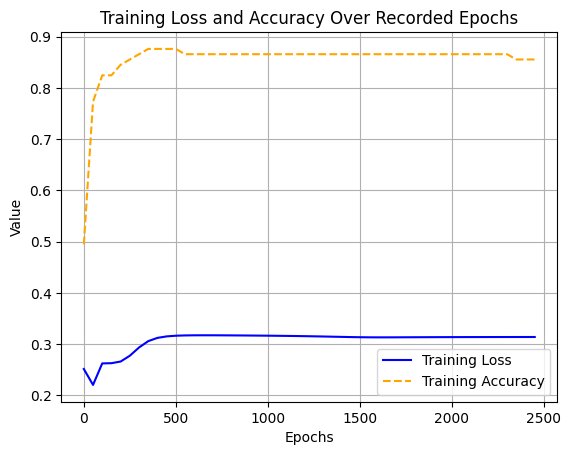

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.91      0.83      0.87        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



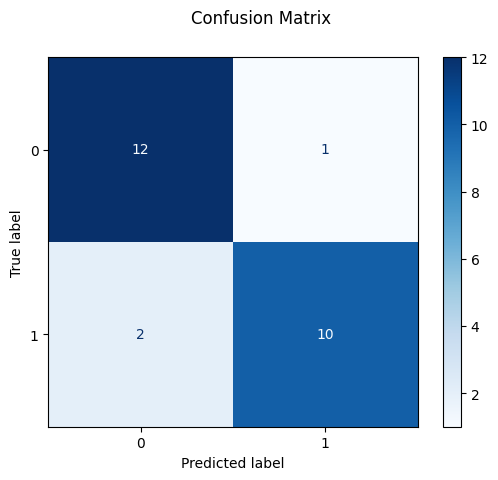

Accuracy:  0.88
Precision:  0.8820779220779221
Recall:  0.88
F1:  0.8796135265700482


In [65]:

# Define the network with dynamic hidden layers
nn3 = CustomNeuralNetwork(input_size=6, 
                         hidden_layers=[4],
                         output_size=1,
                         activationType=ActivationType.SIGMOID,
                         learning_rate=best_params['learning_rate'],
                         momentum=best_params['momentum'],
                         lambd=best_params['lambd'],
                      
                         )

# Train the network
history = nn3.fit(X, y, epochs=2500)

# Plot a single graph with Loss and Training Accuracy
plt.figure()

# Plot Training Loss
plt.plot(history['epoch'], history['train_loss'], label='Training Loss', color='blue', linestyle='-')

# Plot Training Accuracy
plt.plot(history['epoch'], history['train_acc'], label='Training Accuracy', color='orange', linestyle='--')

# Configure the plot
plt.xlabel('Epochs')  # X-axis as the recorded epochs
plt.ylabel('Value')  # Shared y-axis label
plt.title('Training Loss and Accuracy Over Recorded Epochs')
plt.legend()  # Display legend
plt.grid(True)

# Display the plot
plt.show()


# Test predictions
monk3_test_nn_predictions = nn3.predict(monk3_validation_X)
customClassificationReport(monk3_validation_Y, monk3_test_nn_predictions)

#  Testing on Real Testing Data

### MONK1

In [49]:
print(monk1_test_data)
monk1_test_data=removeId (monk1_test_data)
monk1_real_test_X,monk1_real_test_Y= splitToFeaturesAndTarget(monk1_test_data)
print('X:',monk1_real_test_X)
print('y: ',monk1_real_test_Y)

     target  a1  a2  a3  a4  a5  a6        ID
0         1   1   1   1   1   1   1    data_1
1         1   1   1   1   1   1   2    data_2
2         1   1   1   1   1   2   1    data_3
3         1   1   1   1   1   2   2    data_4
4         1   1   1   1   1   3   1    data_5
..      ...  ..  ..  ..  ..  ..  ..       ...
427       1   3   3   2   3   2   2  data_428
428       1   3   3   2   3   3   1  data_429
429       1   3   3   2   3   3   2  data_430
430       1   3   3   2   3   4   1  data_431
431       1   3   3   2   3   4   2  data_432

[432 rows x 8 columns]
X: [[1 1 1 1 1 1]
 [1 1 1 1 1 2]
 [1 1 1 1 2 1]
 ...
 [3 3 2 3 3 2]
 [3 3 2 3 4 1]
 [3 3 2 3 4 2]]
y:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 

#### SVM

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68       216
           1       0.68      0.65      0.66       216

    accuracy                           0.67       432
   macro avg       0.67      0.67      0.67       432
weighted avg       0.67      0.67      0.67       432



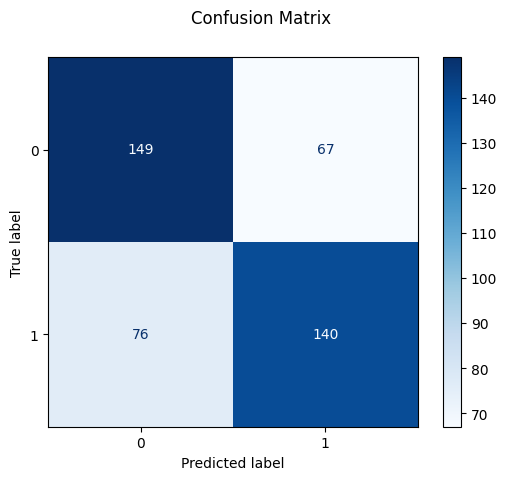

Accuracy:  0.6689814814814815
Precision:  0.6692753623188407
Recall:  0.6689814814814815
F1:  0.6688377478651035


In [50]:
monk1_real_test_predictions_svm=svm_classifier .predict(monk1_real_test_X)
customClassificationReport(monk1_real_test_Y, monk1_real_test_predictions_svm)

#### Custom Neural Network

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.72       216
           1       0.73      0.62      0.67       216

    accuracy                           0.69       432
   macro avg       0.70      0.69      0.69       432
weighted avg       0.70      0.69      0.69       432



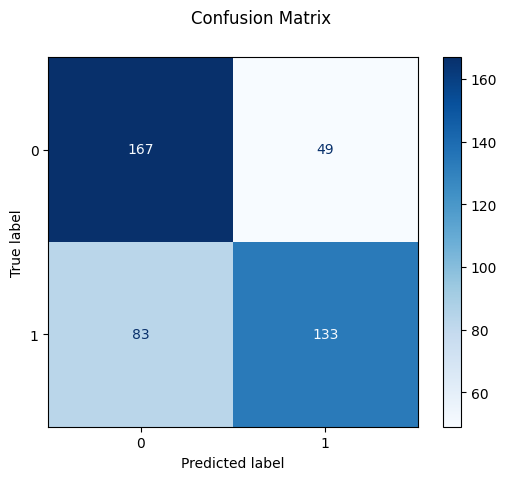

Accuracy:  0.6944444444444444
Precision:  0.6993846153846154
Recall:  0.6944444444444444
F1:  0.6925399529838032


In [64]:
monk1_real_test_predictions_nn=nn1.predict(monk1_real_test_X)
customClassificationReport(monk1_real_test_Y, monk1_real_test_predictions_nn)

### MONK2

In [52]:
print(monk2_test_data)
monk2_test_data=removeId (monk2_test_data)
monk2_real_test_X,monk2_real_test_Y= splitToFeaturesAndTarget(monk2_test_data)
print('X:',monk2_real_test_X)
print('y: ',monk2_real_test_Y)

     target  a1  a2  a3  a4  a5  a6        ID
0         0   1   1   1   1   1   1    data_1
1         0   1   1   1   1   1   2    data_2
2         0   1   1   1   1   2   1    data_3
3         0   1   1   1   1   2   2    data_4
4         0   1   1   1   1   3   1    data_5
..      ...  ..  ..  ..  ..  ..  ..       ...
427       0   3   3   2   3   2   2  data_428
428       0   3   3   2   3   3   1  data_429
429       0   3   3   2   3   3   2  data_430
430       0   3   3   2   3   4   1  data_431
431       0   3   3   2   3   4   2  data_432

[432 rows x 8 columns]
X: [[1 1 1 1 1 1]
 [1 1 1 1 1 2]
 [1 1 1 1 2 1]
 ...
 [3 3 2 3 3 2]
 [3 3 2 3 4 1]
 [3 3 2 3 4 2]]
y:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 

#### SVM

In [ ]:
monk2_real_test_predictions_svm=svm_classifier .predict(monk2_real_test_X)
customClassificationReport(monk2_real_test_Y, monk2_real_test_predictions_svm)

#### Custom Neural Network

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74       290
           1       0.33      0.18      0.23       142

    accuracy                           0.61       432
   macro avg       0.50      0.50      0.49       432
weighted avg       0.56      0.61      0.57       432



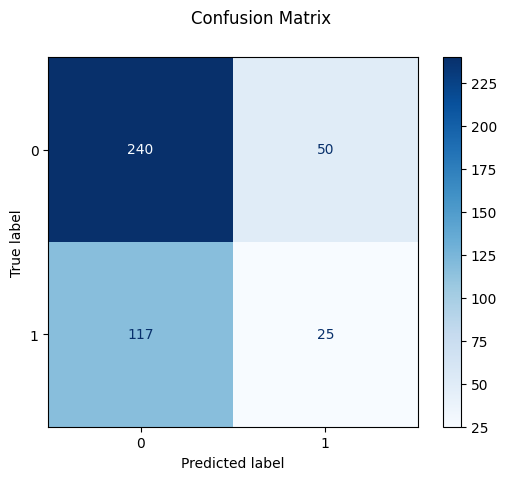

Accuracy:  0.6134259259259259
Precision:  0.5608595289967839
Recall:  0.6134259259259259
F1:  0.5737632535633234


In [53]:
monk2_real_test_predictions_nn=nn2.predict(monk2_real_test_X)
customClassificationReport(monk2_real_test_Y, monk2_real_test_predictions_nn)

### MONK3

In [54]:
print(monk3_test_data)
monk3_test_data=removeId (monk3_test_data)
monk3_real_test_X,monk3_real_test_Y= splitToFeaturesAndTarget(monk3_test_data)
print('X:',monk3_real_test_X)
print('y: ',monk3_real_test_Y)

     target  a1  a2  a3  a4  a5  a6        ID
0         1   1   1   1   1   1   1    data_1
1         1   1   1   1   1   1   2    data_2
2         1   1   1   1   1   2   1    data_3
3         1   1   1   1   1   2   2    data_4
4         1   1   1   1   1   3   1    data_5
..      ...  ..  ..  ..  ..  ..  ..       ...
427       0   3   3   2   3   2   2  data_428
428       0   3   3   2   3   3   1  data_429
429       0   3   3   2   3   3   2  data_430
430       0   3   3   2   3   4   1  data_431
431       0   3   3   2   3   4   2  data_432

[432 rows x 8 columns]
X: [[1 1 1 1 1 1]
 [1 1 1 1 1 2]
 [1 1 1 1 2 1]
 ...
 [3 3 2 3 3 2]
 [3 3 2 3 4 1]
 [3 3 2 3 4 2]]
y:  [1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 

#### SVM

In [ ]:
monk3_real_test_predictions_svm=svm_classifier .predict(monk3_real_test_X)
customClassificationReport(monk3_real_test_Y, monk3_real_test_predictions_svm)

#### Custom Neural Network

Classification report:
               precision    recall  f1-score   support

           0       0.52      0.54      0.53       204
           1       0.58      0.55      0.56       228

    accuracy                           0.55       432
   macro avg       0.55      0.55      0.55       432
weighted avg       0.55      0.55      0.55       432



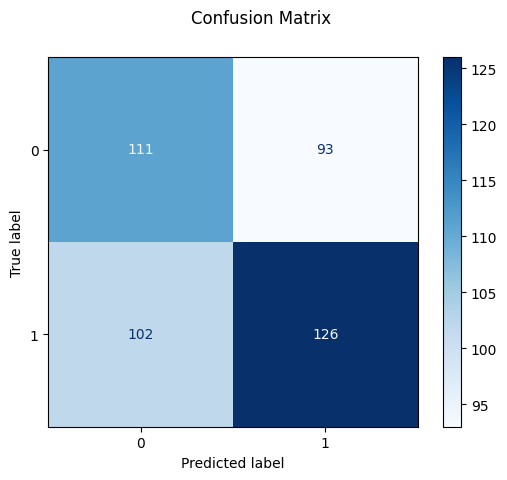

Accuracy:  0.5486111111111112
Precision:  0.549740604969237
Recall:  0.5486111111111112
F1:  0.548938030783427


In [55]:
monk3_real_test_predictions_nn=nn1.predict(monk3_real_test_X)
customClassificationReport(monk3_real_test_Y, monk3_real_test_predictions_nn)

# PAPER
One Hot Encoding -> 17 input

## MONK1
- Weight Decay in backpropagation
- Early Stopping


## MONK2
- Constructive Induction
- Weight Decay e Learning Rate Adjustment


## MONK3
- Noise Tolerance
- Weight Decay
- Rule Pruning